#### Calculo y Ploteo del modelo
##### En este notebook, cargamos el dataset creado en el notebook_datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [2]:
df = pd.read_csv("datasets/meli_accesos.csv", sep=";")
df

,accesos,precio
0,15,107
1,16,122
2,"16,5",142
3,"17,5",249
4,"18,5",337
5,"19,5",536
6,"20,25",1000
7,21,1600


Transformamos la variable X

In [3]:
X = df["accesos"].str.replace(",", ".").astype(float)
X = X.astype(float).to_numpy()
X

array([15.  , 16.  , 16.5 , 17.5 , 18.5 , 19.5 , 20.25, 21.  ])

Transformamos la variable y

In [4]:
y = df["precio"].to_numpy()
y

array([ 107,  122,  142,  249,  337,  536, 1000, 1600], dtype=int64)

Importamos el r2_score de sklearn para puntuar la relación entre las dos variables

In [49]:
from sklearn.metrics import r2_score
mymodel = np.poly1d(np.polyfit(X, y, 2)) #Creamos el modelo
myline = np.linspace(15, 25, 20) #Creamos la linea para cruzar en el ploteo
print(r2_score(y, mymodel(X))) #Calculamos la relación del modelo.

0.9625225545800997


Tenemos una relación de casi 1 a 1. Lo que debería tener una correlación muy fuerte entre el acceso a internet y el precio de la acción

Ploteamos el modelo junto a los datos originales:

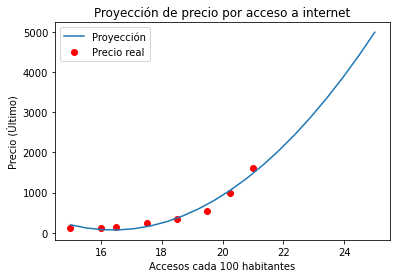

In [50]:
plt.scatter(X, y, c="red", label="Precio real")
plt.xlabel('Accesos cada 100 habitantes')
plt.ylabel(r'Precio (Último)')
plt.plot(myline, mymodel(myline), label="Proyección")
plt.title("Proyección de precio por acceso a internet")
plt.legend()
plt.savefig('plot.png', dpi=300, bbox_inches='tight')

Exportamos el modelo para su visualización en Tableau:

In [27]:
df_out = pd.DataFrame(mymodel(myline))
df_out.to_csv("linea_modelo.csv")
df_out

,0
0,197.092391
1,114.573155
2,73.064572
3,72.566642
4,113.079365
5,194.602741
6,317.136769
7,480.681451
8,685.236786
9,930.802773
